# Setup

In [1]:
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pylab as plt
print("TensorFlow version: ", tf.__version__)

2023-06-19 13:49:19.455421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 13:49:19.623043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-19 13:49:19.623060: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-19 13:49:20.742414: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

TensorFlow version:  2.11.0


# Generate a TensorFlow Model
We'll build a CNN model to classify numbers from the MNIST dataset based on LeNet-5 Model with change that kernel size from 5x5 to 3x3.

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

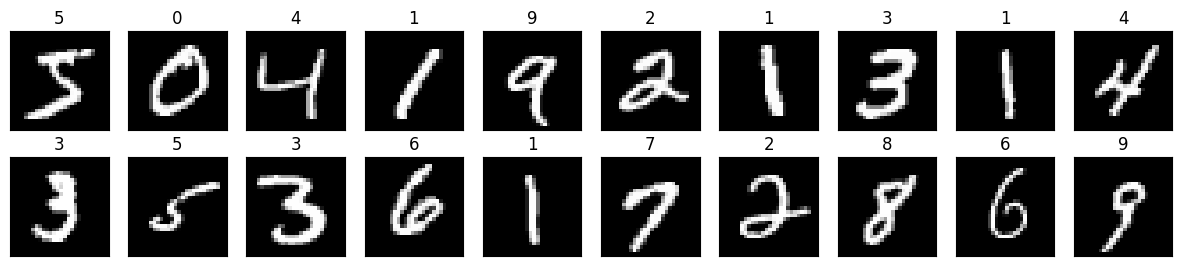

In [3]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
    ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_images[i]), cmap='gray')
    ax.set_title(train_labels[i])

In [4]:
# Define the model architecture
# CNN
initializer = tf.keras.initializers.GlorotUniform(0)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=initializer, bias_initializer=initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=initializer, bias_initializer=initializer),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer, bias_initializer=initializer),
    tf.keras.layers.Dense(10, kernel_initializer=initializer, bias_initializer=initializer)
])

# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
model.fit(
    train_images,
    train_labels,
    batch_size=128,
    epochs=10,
    validation_data=(test_images, test_labels)
)

2023-06-19 13:49:24.619855: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-19 13:49:24.619922: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-19 13:49:24.619956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RaizelAsus): /proc/driver/nvidia/version does not exist
2023-06-19 13:49:24.620377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 13:49:24.718479: W tensorflow/tsl/framework/cpu_allocator_impl

Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 0.4462 - accuracy: 0.8758 - val_loss: 0.1390 - val_accuracy: 0.9606
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.1139 - accuracy: 0.9664 - val_loss: 0.0814 - val_accuracy: 0.9767
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0791 - accuracy: 0.9764 - val_loss: 0.0626 - val_accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0615 - val_accuracy: 0.9797
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0530 - val_accuracy: 0.9836
Epoch 6/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0496 - accuracy: 0.9845 - val_loss: 0.0524 - val_accuracy: 0.9836
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0530 - val_accuracy:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0

In [6]:
# evaluate the model
# loss, accuracy = model.evaluate(valid_images, valid_labels, verbose=0)
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0) 
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.68000149726868


# Convert to a TensorFlow Lite model
Now you can convert the trained model to TensorFlow Lite format using the TensorFlow Lite Converter, and apply varying degrees of quantization. 

Beware that some versions of quantization leave some of the data in float format. So the following sections show each option with increasing amounts of quantization, until we get a model that's entirely int8 or uint8 data. (Notice we duplicate some code in each section so you can see all the quantization steps for each option.)

First, here's a converted model with no quantization:

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpptcsy7kg/assets


INFO:tensorflow:Assets written to: /tmp/tmpptcsy7kg/assets
2023-06-19 13:54:53.176494: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-06-19 13:54:53.176536: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-06-19 13:54:53.177806: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpptcsy7kg
2023-06-19 13:54:53.181731: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-19 13:54:53.181811: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpptcsy7kg
2023-06-19 13:54:53.190150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-06-19 13:54:53.191714: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-06-19 13:54:53.296317: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [8]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


## Convert using integer-only quantization
To quantize the input and output tensors, and make the converter throw an error if it encounters an operation it cannot quantize, convert the model again with some additional parameters:

In [9]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant_it = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpq1n8v0t8/assets


INFO:tensorflow:Assets written to: /tmp/tmpq1n8v0t8/assets
/home/thai/.local/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:765: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-06-19 13:54:55.955236: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-06-19 13:54:55.955277: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-06-19 13:54:55.955617: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpq1n8v0t8
2023-06-19 13:54:55.957936: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-19 13:54:55.957973: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpq1n8v0t8
2023-06-19 13:54:55.967967: I tensorflow/cc/saved_model/loader.cc:2

In [10]:
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant_it)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


## Save the models as files
You'll need a **.tflite** file to deploy your model on other devices. So let's save the converted models to files and then load them when we run inferences below.

In [11]:
tflite_models_dir = pathlib.Path("./cnnnew_mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"cnnnew_mnist_model.tflite"

# Save the integer-only quantized model:
tflite_model_quant_it_file = tflite_models_dir/"cnnnew_mnist_quantization.tflite"

In [12]:
# Save the unquantized/float model:
tflite_model_file.write_bytes(tflite_model)

# Save the integer-only quantized model:
tflite_model_quant_it_file.write_bytes(tflite_model_quant_it)

24000

# Run the TensorFlow Lite models
Now we'll run inferences using the TensorFlow Lite Interpreter to compare the model accuracies. 

First, we need a function that runs inference with a given model and images, and then returns the predictions:

In [13]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices):
  global test_images

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = test_images[test_image_index]
    test_label = test_labels[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
#     print(output)

    predictions[i] = output.argmax()

  return predictions

### Test the models on one image
Now we'll compare the performance of the float model and quantized model.

Let's create another function to print our predictions:

In [14]:
# Change this to test a different image
test_image_index = 51

## Helper function to test the models on one image
def test_model(tflite_file, test_image_index, model_type):
    global test_labels

    predictions = run_tflite_model(tflite_file, [test_image_index])

    plt.imshow(test_images[test_image_index])
    template = model_type + " Model \n True:{true}, Predicted:{predict}"
    _ = plt.title(template.format(true= str(test_labels[test_image_index]), predict=str(predictions[0])))
    plt.grid(False)

Now test the float model:

In [15]:
# test_model(tflite_model_file, test_image_index, model_type="Float")

And test the integer-only quantized model

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


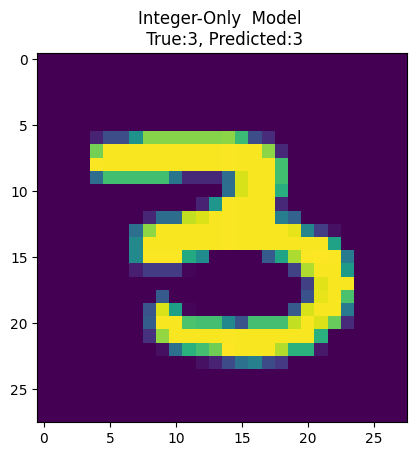

In [16]:
test_model(tflite_model_quant_it_file, test_image_index, model_type="Integer-Only ")

### Evaluate the models on all images
Now let's run both models using all the test images we loaded at the beginning of this tutorial:

In [17]:
# Helper function to evaluate a TFLite model on all images
def evaluate_model(tflite_file, model_type):
  global test_images
  global test_labels

  test_image_indices = range(test_images.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

  accuracy = (np.sum(test_labels == predictions) * 100) / len(test_images)
#   for idx in range(len(test_labels)):
#         if (predictions[idx] != test_labels[idx]):
#             print('FAIL: Test case', idx)

  print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(test_images)))

Evaluate the float model:

In [18]:
evaluate_model(tflite_model_file, model_type="Float")

Float model accuracy is 98.6800% (Number of test samples=10000)


Evaluate the integer-only quantized model:

In [19]:
evaluate_model(tflite_model_quant_it_file, model_type="Integer-Only")

Integer-Only model accuracy is 98.6700% (Number of test samples=10000)
